<a href="https://colab.research.google.com/github/sushii-00/DanielBourke_DL_Course/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to regression with neural networks in tensorflow

There are many definitions for a regression problem but in our  case, we're going to simplify it:

* predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
#import tensorflow 
import tensorflow as tf
print(tf.__version__)

2.4.1


## creating some data to view and fit


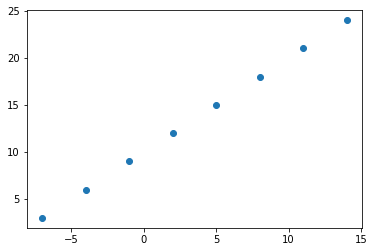

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creating features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# creating labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualise it:

plt.scatter(X,y);


In [ ]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes

In [ ]:
# create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape , output_shape

((8,), (8,))

In [ ]:
 X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# turn numpy arrays into tensors with data type float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype= tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

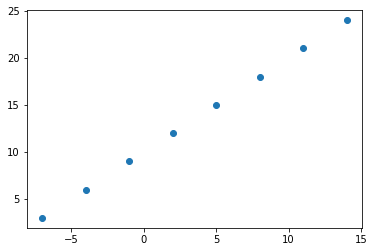

In [ ]:
plt.scatter(X,y)

## steps in modelling with tensorflow

1. **Creating a model**- define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how wrong it is) and the optimiser (tells our model how to improve its patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and y (features and labels).

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,  #mae= mean absolute error; error is the difference absolutes and predictions 
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochatic gradient descend                          
              metrics= ["mae"])

# 3. fit the model
model.fit(X, y, epochs=5) # epochs => can be defined as X and y are given to the model and it has 5(here) opportunities to go throgh X and y totally befor giving us the final predictions or declaring that the model is trained.


              



Epoch 1/5
1/1 [==============================] - 0s 351ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Try and make prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11 # we added the error to check if our model is only as off as if we added the error to our result our prediction would fall right into place

array([[23.71602]], dtype=float32)

In [ ]:
# but that is still pretty off.

### IMPROVING OUR MODEL
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called as neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here, we might change the optimisation function or perhaps the **learning rate** of the optimisation function.
3. **Fitting a model** - Here, we might fet a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

# common ways of improving a model
* adding layers
* Increase the number of layers
* change the activation functions
* change the optimization function
* change the learning rate


###let's create a more optimised and a more **DEEP** model

* but let's do 1 step at a time:
let us first just increase the number of times the model looks at the dataset. That is, lets increase the number of epochs

In [ ]:
#1. create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model(but this time make it look longer at the training set)
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 268ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
# remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Let's see if our model's prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# by tweeking one little parameter, we have decreased our error mutlifolds

### let's try to make it more optimised. 
* epoch=100 (same as before)
* **change** : Creating a model but this time adding one hidden layer with 100 neurons

In [ ]:
#.1. Creating a model but this time adding one hidden layer with 100 neurons
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(1)
                             ])
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model:
model.fit(X,y,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [ ]:
#reminding ourselves of the dataset:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

array([[31.223137]], dtype=float32)

###it seems like our earlier model was performing better. This could be an **OVERFITTING PROBLEM**

**Overfitting**:

A statistical model is said to be overfitted, when we train it with a lot of data (just like fitting ourselves in oversized pants!).  **When a model gets trained with so much of data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise.**

The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models.

### let's try to make it more optimised. 
* epoch=100 (same as before)
* Creating a model: one hidden layer with 100 neurons(same as before)
* **change** : Creating a model but this time making activation = none

In [ ]:
#.1. Creating a model but this time making activation = none
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation=None),
                             tf.keras.layers.Dense(1)
                             ])
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fit the model:
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 12.9917 - mae: 12.9917
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4876 - mae: 12.4876
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.9795 - mae: 11.9795
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4648 - mae: 11.4648
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9408 - mae: 10.9408
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4048 - mae: 10.4048
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8541 - mae: 9.8541
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.2858 - mae: 9.2858
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6971 - mae: 8.6971
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0848 - mae: 8.0848
Epoch 11/100
1/1 [==============================] - 0s 6ms/step -

In [ ]:
model.predict([17.0])

array([[29.69169]], dtype=float32)

### that didn't prove to make our model better. So let us try to make it better

###THE CHANGES
* epoch=100 (same as before)
* Creating a model: one hidden layer with 100 neurons(same as before)
* Creating a model with activation = none
* compile the model but this time changing the optimizer, i.e., from SGD TO ADAM()

In [ ]:
#.1. Creating a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation=None),
                             tf.keras.layers.Dense(1)
                             ])
# 2. compile the model but this time changing the optimizer
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
#3. Fit the model:
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 354ms/step - loss: 13.4562 - mae: 13.4562
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3526 - mae: 13.3526
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2489 - mae: 13.2489
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.1452 - mae: 13.1452
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0414 - mae: 13.0414
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9377 - mae: 12.9377
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8338 - mae: 12.8338
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 12.7300 - mae: 12.7300
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6260 - mae: 12.6260
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5220 - mae: 12.5220
Epoch 11/100
1/1 [==============================] - 0s 5

In [ ]:
model.predict([17.0])

array([[30.44963]], dtype=float32)

### worse again

### THIS TIME LET US CHANGE THE LEARNING RATE OF THE OPTIMISER:
THEREFORE,
* epoch=100 (same as before)
* Creating a model: one hidden layer with 100 neurons(same as before)
* Creating a model with activation = none
* compile the model but this time changing the optimizer, i.e., from SGD TO ADAM()
* compile the model but this time changing the LEARNING RATE OF THE ADAM optimizer, BY DEFAULT IT WAS0.001, WE INCREASE 10 TIMES: 0.01

In [ ]:
#.1. Creating a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation=None),
                             tf.keras.layers.Dense(1)
                             ])
# 2. compile the model but this time changing the LEARNING RATE OF THE ADAM optimizer, BY DEFAULT IT WAS 0.001, WE INCREASE 10 TIMES: 0.01
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#3. Fit the model:
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 336ms/step - loss: 13.2840 - mae: 13.2840
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.2580 - mae: 12.2580
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2299 - mae: 11.2299
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1921 - mae: 10.1921
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1385 - mae: 9.1385
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0623 - mae: 8.0623
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9562 - mae: 6.9562
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9189 - mae: 6.9189
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3651 - mae: 7.3651
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8747 - mae: 7.8747
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - los

In [ ]:
model.predict([17.0])

array([[26.964045]], dtype=float32)

###This  is the best prediction our model has made till now, which is , according to the pattern of the dataset, for 17.0 it should’ve predicted 27, because x=y+10. 











### in our case, ADJUSTING THE LEARNING RATE HAS IMPROVED THE PREDICTION MULTIFOLDS.
AND IN MOST OF THE MODELS, **LEARNING RATE IS THE MOST IMPORTANT HYPER PARAMETER, THAT WHEN ADJUSTED, CAN MAKE MODEL'S PREDICTIONS BETTER**

### EVALUATING A MODEL

 In practice, a typical workflow you'll go through when building neural networl is:






---
Building a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> evaluate it...


---




# common ways of improving a model
* adding layers
* Increase the number of layers
* change the activation functions
* change the optimization function
* change the learning rate

###EVALUATED EARLIER. THESE ARE HYPERPARAMETERS. HYPER PARAMETERS ARE LIKE DIALS ON OUR NEURAL NETWORK MODEL THAT WE CAN ADJUST TO SEE HOW THE PERFORMANCE OF OUR MODEL CHANGES.


# when it comes to evaluation. there are 3 words you should memorize:

> "VISUALISE,VISUALIZE,VISUALISE"

It's a good idea to visualise:
 * The data - what data are we working with? What does it look like?
 * The model itself- what does our model look like?
 * the training of a model - how does a model perform while it learns?
 * The predictions of the model- how do the predictions of a model line up against the ground truth(the original labels)?

### making a another (bigger) data set this time

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make label for the dataset
y=X+10 # this is the relation we want our model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

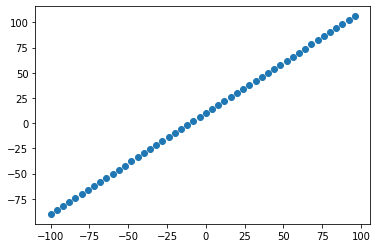

In [ ]:
#visualise the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

###The 3 sets...
* **Training SET**- The model learns from this data, which is typically 70-80 % of the data you have available.

* **Validation Set** - The model gets tuned on this data, which is typically 10-15% of the data available.
* **Test Set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the data available.

### in practice...

In [ ]:
# check the length of how many samples we have
len(X)

50

# since this is still a pretty small dataset, we will skip on the validation set
 we shall use:

 * 80% - TRAINING SET
 * 20% - TEST SET

In [ ]:
#Split the data into test and train sets
X_train = X[:40] #first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### VISUALIZING THE DATA
Now we've got our data in training and test sets... let's visualise it

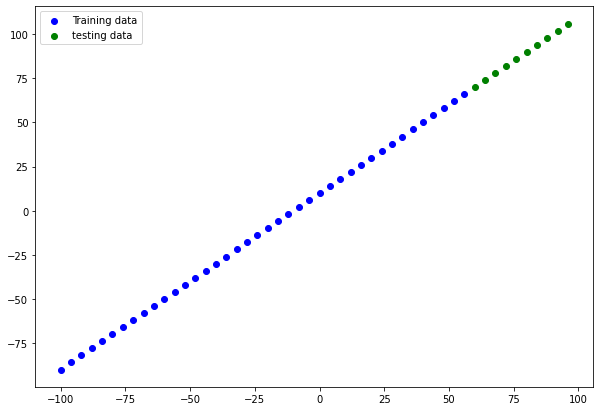

In [ ]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train, y_train,c='b',label="Training data") #our model will learn on this 
#plot test data in green
plt.scatter(X_test, y_test, c='g',label="testing data") #want our model to be able to predict this(given X, what's y?)
#show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [ ]:
#model.summary()
#ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
# Let's create a model which builds autoatically by defining the input_shape aurgument in the first layer.
tf.random.set_seed(42)

#1. Create a model (same as above)
model = tf.keras.Sequential([ 
  tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
  tf.keras.layers.Dense(1, name = "output_layer")
],name="model_1")

#2. compile the model(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["mae"])




In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).

In [ ]:
model.fit(X_train, y_train,epochs=100,verbose=1) #verbose=0 shows no output

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 24.7686 - mae: 24.7686
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8862 - mae: 13.8862
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6938 - mae: 8.6938
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 11.7512 - mae: 11.7512
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3957 - mae: 12.3957
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2640 - mae: 11.2640
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4643 - mae: 9.4643
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5047 - mae: 7.5047
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 7.8050 - mae: 7.8050
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 7.1223 - mae: 7.1223
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - lo

In [ ]:
#get the summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


###using PLOT MODEL to visualise our model

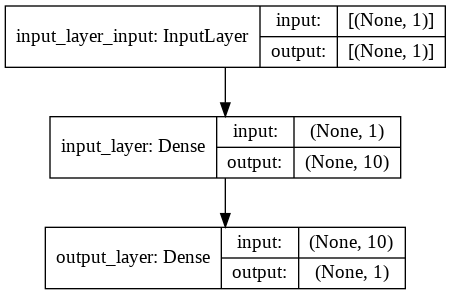

In [ ]:
# another way to visualise our model
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### visualing our model's predictions

to visualise, it is a good idea to plotthem against the ground truth

often you'll see this in the form of y_test or y_true vs y_pred

In [ ]:
#make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.60006 ],
       [ 74.63862 ],
       [ 78.67718 ],
       [ 82.71574 ],
       [ 86.7543  ],
       [ 90.79286 ],
       [ 94.83143 ],
       [ 98.86999 ],
       [102.90854 ],
       [106.947105]], dtype=float32)

In [ ]:
y_test #ground truth

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

###In the ideal would want our model to predict exactly the ground truth values.

Rather than comparing them manually one by one we can just plot a graph of the actual values of y and those predicted by our model.

#Let's see how we visualise them


🔑 Note: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
#Let's create a plotting function.
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  plots training data, test data and compares predictions to the ground truth labels
  
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # plot test data in green
  plt.scatter(test_data,test_labels,c="g",label="Test data")
  #plot model's predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")

  #show legend
  plt.legend(); 


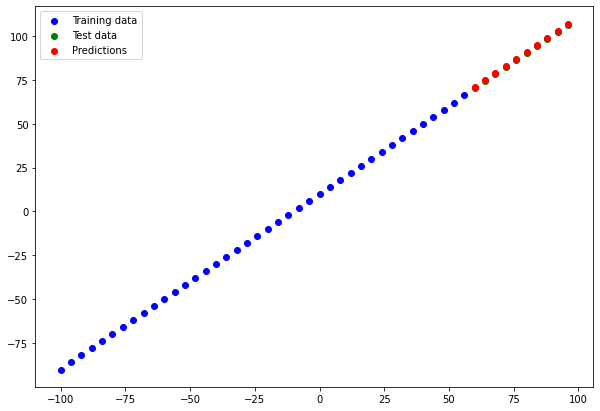

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)
#you dont have to give the arguments, but this is just to keep it complete.

* that is pretty accurate: with SGD()

* with Adam(lr=0.02 AND EPOCHS EXACTLY EQUAL TO 100, IF YOU INCREASE THE EPOCHS, I.E., BY RUNNING THE MODEL MULTIPLE TIMES, IT MIGHT GET OVERFITTED, THEREFORE IN SUCH CASES JUST RESTART AND RUN ALL.)

#but just to know how much error actually exists...

###Evaluating our model's predictions with regression evaluation metrics

* MEAN ABSOULTE ERROR: 
 >tf.keras.losses.MAE()
 
 > "on average, how wrong is each of my model's predictions" 

(WHEN TO USE: AS A GREAT STARTER METRIC FOR ANY REGRESSION PROBLEM.)

* MEAN SQUARED ERROR(MSE):
 > tf.keras.losses.MSE() 

 > "square the average errors."

(WHEN TO USE: WHEN THE LARGER ERRORS ARE MORE SIGNIFICANT THAN SMALLER ERRORS.)

* HUBER : tf.keras.losses.Huber()

(WHEN TO USE: COMBINATION OF MSE AND MAE. LESS SENSITIVE TO OUTLIERS THAN MSE.) 

In [ ]:
# evaluate the model on the test set
model.evaluate(X_test,y_test) #Returns the loss value & metrics values for the model in test mode.

1/1 [==============================] - 0s 125ms/step - loss: 0.7736 - mae: 0.7736


[0.7735801935195923, 0.7735801935195923]

In [ ]:
# calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.519953, 14.416829, 12.129129, 10.656853, 10.      , 10.158572,
       11.132571, 12.921992, 15.526831, 18.947105], dtype=float32)>

In [ ]:
y_pred

array([[ 70.60006 ],
       [ 74.63862 ],
       [ 78.67718 ],
       [ 82.71574 ],
       [ 86.7543  ],
       [ 90.79286 ],
       [ 94.83143 ],
       [ 98.86999 ],
       [102.90854 ],
       [106.947105]], dtype=float32)

In [ ]:
#this is in an array format, let's make it a tensor.

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.60006 ],
       [ 74.63862 ],
       [ 78.67718 ],
       [ 82.71574 ],
       [ 86.7543  ],
       [ 90.79286 ],
       [ 94.83143 ],
       [ 98.86999 ],
       [102.90854 ],
       [106.947105]], dtype=float32)>

In [ ]:
#now,
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#their shapes DON'T match and for error calculation, they must.
#therefor, we need to reshape the y_pred tensor.

In [ ]:
tf.squeeze(y_pred) #doing this will get rid of the extra 1 dimension.

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.60006 ,  74.63862 ,  78.67718 ,  82.71574 ,  86.7543  ,
        90.79286 ,  94.83143 ,  98.86999 , 102.90854 , 106.947105],
      dtype=float32)>

In [ ]:
#now, both the tensors are of the same shape.

In [ ]:
mae = tf.keras.losses.MAE(y_test,tf.squeeze(y_pred))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=0.7735817>

In [ ]:
#yay!! 


### NOW, let's calculate the MSE

In [ ]:
mse = tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.61069584>

In [ ]:
# the error is large because, obviously it is squared.

###HUBER:

In [ ]:
#huber = tf.keras.losses.Huber(y_test,tf.cast(tf.squeeze(y_pred),dtype=tf.float32))
#huber

In [ ]:
#make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true=y_true,
                             y_pred=tf.squeeze(y_pred))
  
def mse(y_true,y_pred):
  return tf.keras.losses.MSE(y_true=y_true,
                             y_pred=tf.squeeze(y_pred))


In [ ]:
mse(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.61069584>

In [ ]:
mae(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.7735817>

###Running experiments to improve our model
---

Build a model -> fit it -> evaluate it ->tweak it -> fit it -> evaluate it ->tweak it -> fit it -> evaluate it ...

---


1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model of a chance to find patterns in the data.

Let's do 3 modelling experiments:
 1. 'model_1'  - same as the original, 1 layer, trained for 100 epochs
 2. 'model_2' - 2 layers, 100 epochs
 3. 'model_3' - 2 layers, 500 epochs

 **BUILD MODEL_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1)
    ])

#2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss:

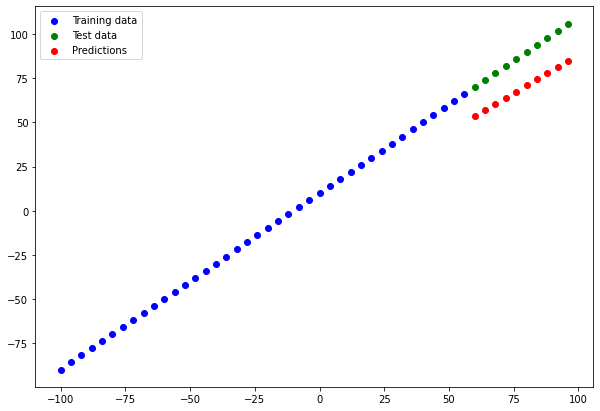

In [ ]:
# make and plot predictions
y_preds_1 = model_1.predict(X_test)

plot_predictions(predictions=y_preds_1)

In [ ]:
#that is quite a large diffence, let's calculate the error evaluation

In [ ]:
mae_1 = mae (y_test, y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model_2**

* 2 dense layers, epochs =100

In [ ]:
# set random seed
tf.random.set_seed(42)

#1. create the model
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])
     

#compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 26.8627 - mse: 1015.8976
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.4175 - mse: 767.5334
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 31.5187 - mse: 1433.3081
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8490 - mse: 1141.6671
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.6465 - mse: 267.4541
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9682 - mse: 169.5529
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 42.4087 - mse: 2772.5432
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 28.3537 - mse: 1129.8181
Epoch 11/100
2/2 [=======================

In [ ]:
#make plots and predictions
y_preds_2 = model_2.predict(X_test)
y_preds_2, y_test


(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

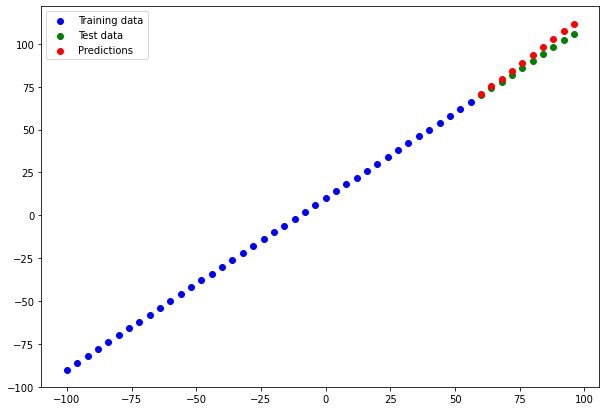

In [ ]:
plot_predictions(predictions=y_preds_2)

In [ ]:
# calculate model_2 evaluation matrices:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model_3**
same as model_2, but epochs=500

In [ ]:
  # set random seed
tf.random.set_seed(42)

#1. create the model
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])


#compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 26.8627 - mse: 1015.8976
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.4175 - mse: 767.5334
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 31.5187 - mse: 1433.3081
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 27.8490 - mse: 1141.6671
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.6465 - mse: 267.4541
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.9682 - mse: 169.5529
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 42.4087 - mse: 2772.5432
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 28.3537 - mse: 1129.8181
Epoch 11/500
2/2 [==========================

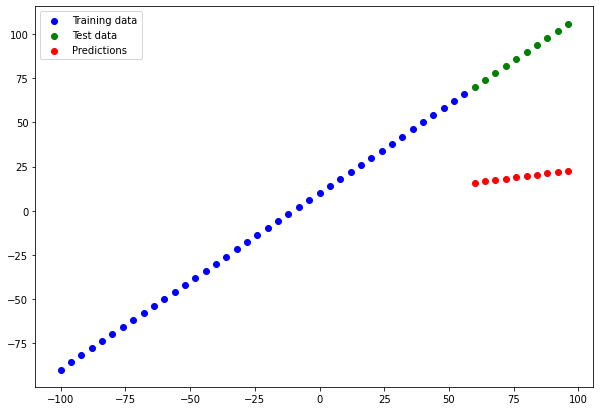

In [ ]:
# predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

that is BAD!!!!!

problem: **OVERFITTING** 


LET US CALCULATE THE ERROR 

In [ ]:

mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 Note: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

###Comparing the results of our models

We've run a few experimenrs, let's compare the results


In [ ]:
# Let's compare our model's results using a pandas dataframe.
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3", mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","MAE","MSE"])
all_results

,model,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


###LOOKS LIKE model_2 PERFORMED THE BEST

In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

###Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 Resource: As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).



###Saving our models:

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.


There are two main formats we can save our model's to:

* The SavedModel format
* The HDF5 format

In [ ]:
#save a model using SavedModel format
model_2.save("best_model_SavedModel_format") #you get a folder // *default

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
#save a model using HDF5 format
model_2.save("best_model_HDF5_format.h5")  #you get a single file

###LOADING A MODEL AND RE-EVALUATE IT CORRECTLY

In [ ]:
# load in the SavedFormat format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#the summary is same for both, model_2 and SavedFormat format model

In [ ]:
#compare model_2 predictions with the SavedModel format model predictions.
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#let's look at the predictions made by both of the models 
#model_2_preds, loaded_SavedModel_format_preds

In [ ]:
# load in the HDF5 format model
loaded_HDF5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_HDF5_format.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_HDF5_format_preds = loaded_HDF5_format.predict(X_test)
loaded_HDF5_format_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###WORKS!

###Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/DBourke_01tensorflow

In [ ]:
!ls /content/drive/MyDrive/DBourke_01tensorflow

best_model_HDF5_format.h5
